In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
#%matplotlib notebook
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

date: fecha de cuando el evento sucede<br>
event_id: id de evento<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: ...<br>
<b>application_id:</b> es el id de la aplicación donde pasó el evento <br>
<b>attributed:</b> event de interés(1ra vez o nuevamente) atribuido a Jamp<br>
device_countrycode: codigo de país relacionado al dispo<br>
device_os_version: os version usada por el dispo<br>
device_brand: marca del dispo<br>
device_model: modelo del dispo<br>
device_city: ciudad donde el evento sucedió(inferido y estimado)<br>
session_user_agent: user agent usado donde el evento se produjo<br>
trans_id: id de transacción
user_agent: user agent relacionado con el dispo<br>
event_uuid: uuid4 generado por el evento<br>
kind: ???<br>
device_os: os usado por el dispo<br>
wifi: igual a wifi_connection<br>
connection_type: ???<br>
ip_address: ...<br>
device_language: lenguaje relacionado con el dispo<br>

In [26]:
#Events: Eventos que suceden sobre aplicaciones instaladas de clientes de Jampp.
events = pd.read_csv('../data2/events.csv.gzip',compression='gzip', dtype='object')

In [27]:
# Qué tipo de eventos existen ?
events.head(2)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17


In [28]:
#Qué tipo de eventos existen?
events.describe()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 22:03:19.213,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,f3277538-2a0d-46ce-97bd-c5a65f2c675b,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898


In [45]:
#borramos los datos que no vamos a usar
eve = events.drop(['device_countrycode','device_os_version','device_city','device_brand','device_model','user_agent','device_os','wifi','connection_type','ip_address','device_language','trans_id','carrier'],axis='columns',inplace=False)

In [46]:
eve.head(3)

,date,event_id,ref_type,ref_hash,application_id,attributed,session_user_agent,event_uuid,kind
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,5.516623012570946e+18
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,1cd98205-0d97-4ec2-a019-667997dbfe7a,9.977660181316936e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,f02e2924-21ae-492b-b625-9021ae0a4eca,5.516623012570946e+18


In [41]:
#Id de transacción
len(events.groupby('trans_id').count())

13

In [44]:
#Carrier
len(events.groupby('carrier').count())

84

In [47]:
len(events.groupby('kind').count())

583

In [32]:
#Cantidad de eventos atribuidos a Jampp: 0
eve[(eve['attributed'] == 'False')]['event_uuid'].count()

2489324

In [33]:
eve[(eve['attributed'] == 'True')]['event_uuid'].count()

0

In [34]:
eve['event_uuid'].count()

2489324

In [37]:
#Cantidad de tipos de eventos
len(eve.groupby('event_id').count())

568

In [48]:
#Cómo se distribuyen los usuarios según la cantidad de app de interés
#La idea obtener para todos los usuarios, la cantidad de eventos generados y esos eventos a que app corresponde.
eve.head(3)

,date,event_id,ref_type,ref_hash,application_id,attributed,session_user_agent,event_uuid,kind
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,5.516623012570946e+18
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,1cd98205-0d97-4ec2-a019-667997dbfe7a,9.977660181316936e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,7.164321382499455e+18,f02e2924-21ae-492b-b625-9021ae0a4eca,5.516623012570946e+18


In [49]:
#Cómo se relacionan los clicks/eventos/usuarios
eve.describe()

,date,event_id,ref_type,ref_hash,application_id,attributed,session_user_agent,event_uuid,kind
count,2494423,2494423,2494423,2494423,2494423,2494423,2482637,2489324,2489324
unique,2488829,568,2,196049,269,2,1460,2489324,583
top,2019-03-12 22:03:19.213,22,1891515180541284343,7823950631004872496,66,False,3.819516403548394e+18,f3277538-2a0d-46ce-97bd-c5a65f2c675b,5.500848327478996e+18
freq,3,618228,1882743,2913,325696,2489324,1461049,1,618217


In [72]:
auc = pd.read_csv('../data2/auctions.csv.gzip',compression='gzip', dtype='object')
auc = auc[['device_id']]

In [73]:
auc.head(3)

,device_id
0,6059599345986491085
1,1115994996230693426
2,7463856250762200923


In [151]:
#auc
auc['count'] = 1
auc_app = auc.groupby('device_id',as_index=False).sum().sort_values(by='count',ascending=False)
auc_app.head()

,device_id,count
132965,633139769114048761,27762


In [122]:
e2.head()

,ref_hash,application_id,event_id
0,2688759737656491380,38,0
1,2688759737656491380,38,1
2,2688759737656491380,38,0
3,2688759737656491380,38,2
4,2635154697734164782,38,3


In [117]:
e2 = eve[['ref_hash','application_id','event_id']]

eve_ac = e2.merge(auc,left_on='ref_hash',right_on='device_id',how='inner')
# NO VA eve_ac = e2.merge(auc,left_on='event_id',right_on='device_id',how='inner')
eve_ac['count'] = 1

In [97]:
ea_sorted = eve_ac.groupby('application_id',as_index=False).sum()

ea_sorted = ea_sorted.sort_values(by='count',ascending=False)
ea_sorted.head(5)

,application_id,count
35,145,9669812
186,66,8649591
184,64,6278741
3,103,5802527
94,212,5507349


In [98]:
ea_sorted['application_id'] = ea_sorted['application_id'].apply(pd.to_numeric)
ea_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 35 to 90
Data columns (total 2 columns):
application_id    217 non-null int64
count             217 non-null int64
dtypes: int64(2)
memory usage: 5.1 KB


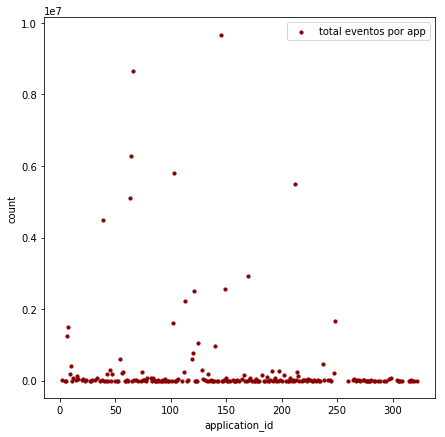

In [123]:
ea_sorted.plot.scatter(x='application_id', y='count', color='DarkRed', label='total eventos por app',s = 10,figsize=(7,7))

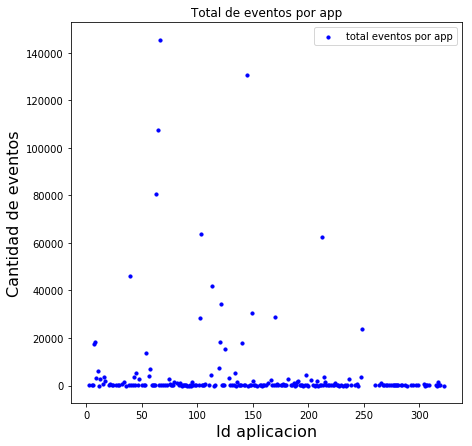

In [175]:
plot3 = ea_sorted2.plot.scatter(x='application_id', y='count',\
                        color='Blue', label='total eventos por app',\
                        s = 10,figsize=(7,7),title="Total de eventos por app")
plot3.set_xlabel("Id aplicacion",fontsize=16)
plot3.set_ylabel("Cantidad de eventos",fontsize=16)

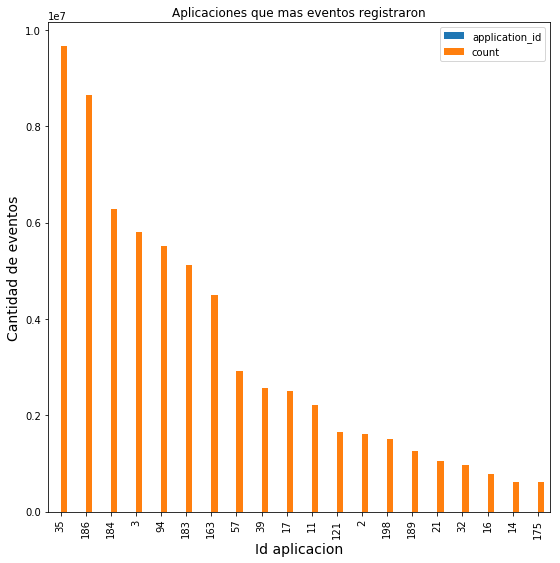

In [139]:
ea_plot = ea_sorted.head(20)
plot = ea_plot.plot.bar(figsize=(9,9),title="Aplicaciones que mas eventos registraron")
plot.set_xlabel('Id aplicacion',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)

In [149]:
auc_app

,count
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367
8963711959081981780,14362
795159065504552200,12275
6841615430383729819,12077
5384039226444052914,11632


In [153]:
e3 = eve[['ref_hash','application_id','event_id']]
eve_ac2 = e2.merge(auc_app,left_on='ref_hash',right_on='device_id',how='inner')
eve_ac2['count'] = 1
ea_sorted2 = eve_ac2.groupby('application_id',as_index=False).sum().sort_values(by='count',ascending=False)
ea_sorted2['application_id'] = ea_sorted2['application_id'].apply(pd.to_numeric)


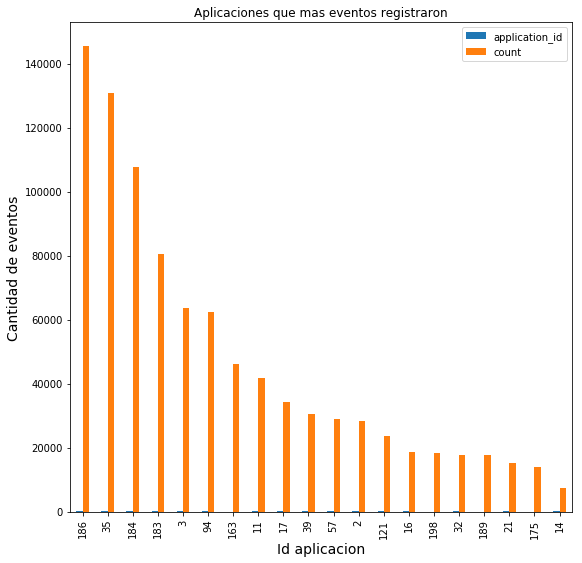

In [158]:
ea_plot2 = ea_sorted2.head(20)
plot2 = ea_plot2.plot.bar(figsize=(9,9),title="Aplicaciones que mas eventos registraron")
plot2.set_xlabel('Id aplicacion',fontsize=14)
plot2.set_ylabel('Cantidad de eventos',fontsize=14)

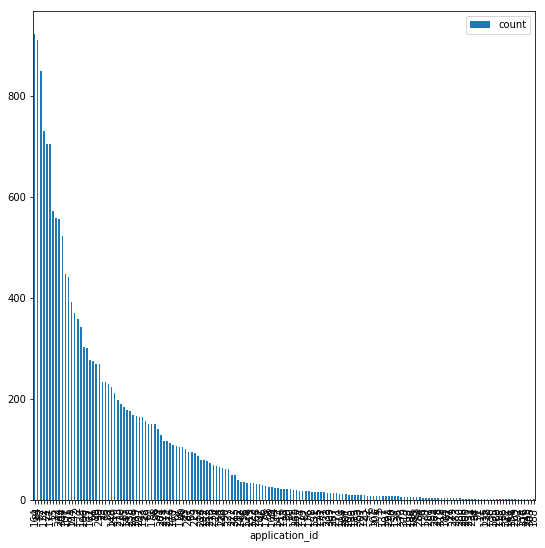

In [169]:
limite = 1000
ea_sorted2[ea_sorted2['count'] < limite].plot.bar(x='application_id',y='count',figsize=(9,9))